<a href="https://colab.research.google.com/github/AmruthaReddy1397/Detection_of_malaria/blob/main/Malaria_Detection_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement: Detection Of Malaria using Transfer learning with SVM**  

*  The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells.
*  It has 13779 parasitized and 13779 uninfected cell instances obtained from the thin blood smear slide images of segmented cells.   
*  This is an image classification problem with two class labels namely Parasitized and Uninfected.
*  A model built using inception v3 (a pretrained transfer learning model) with SVM is used to classify the images.  
*  Inception v3 is used for feature extraction and SVM is used as classifier.

###**Downloading the dataset from Kaggle**  

**Kaggle** is home to many datasets that are available for educational and research purposes.  
One can easily download the Dataset from kaggle onto google colab by providing **account authentication** and **creating an API token.**  
After an API token is created, the following commands are executed to load the dataset.  
An API token creates a username and key which can be used as credentials to activate the API for future access.

In [1]:
#installing the kaggle package into colab
! pip install -q kaggle

In [2]:
#Loading the generated API token which creates a username and key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amruthareddy","key":"179019c63c6b57e219c57649fe2c1bd6"}'}

In [3]:
#creating a directory
! mkdir ~/.kaggle

In [4]:
#copying the json file to the directory
!cp kaggle.json ~/.kaggle/

In [5]:
#Changing the permission to read and write mode
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 658M/675M [00:05<00:00, 154MB/s]
100% 675M/675M [00:05<00:00, 130MB/s]


In [7]:
#Extracting the folders from the malaria zip folder
!unzip cell-images-for-detecting-malaria

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
#! rm -rf /content/cell_images/cell_images

In [8]:
#Thumbs.db is a database file automatically generated which displays thumbnails.
#removing the thumbs.db file of parasitized folder
!rm /content/cell_images/Parasitized/Thumbs.db

In [9]:
#removing the thumbs.db file of the Uninfected folder
!rm /content/cell_images/Uninfected/Thumbs.db

###**Loading Dependencies**

In [10]:
import os 
import cv2 #Python bindings for computer vision
import matplotlib.pyplot as plt #For Data Visualization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #For Data Augumentation

##**Loading the Data** 

In [11]:
#os.listdir() lists the files and sub-directories in specified directory
#os.path.join() is used to concatenate paths.
base_path = '/content/cell_images'
print(os.listdir(base_path)) #listing the folders in content/cell_images
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Parasitized', 'cell_images', 'Uninfected']
Total Parasitized images 13779
Total Uninfected images 13779


We have equal number of parasitized and uninfected images in our dataset

**Viewing a sample image Using OpenCV and Matplotlib**  

OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

To display the image, we read with an image with an imread() function and use matplotlib to show the image

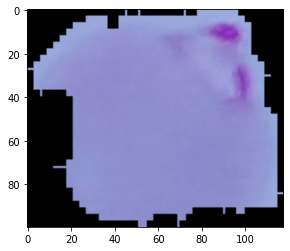

In [12]:
DATADIR = "/content/cell_images"

CATEGORIES = ["Parasitized", "Uninfected"]

for category in CATEGORIES:  # do Parasitized and Uninfected
    path = os.path.join(DATADIR,category)  # create path to Parasitized and Uninfected
    for img in os.listdir(path):  # iterate over each image per Parasitized and Uninfected
        img_data = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_data, cmap='gray')  # graph it
        plt.show()  # display
        break
    break

##**Creating Training, Validation and Test Datasets**  

Next the Training, Validation and Testing datasets are created using the split-folders python package.

70% of the data is set aside for training out of the original dataset.  
Another 15% percent will be used as validation data.

In [13]:
#Installing split-folders which is used to split a folder to train, validation and test data folders
!pip install split-folders

In [14]:
# splitting the data into train, validation and test set
import splitfolders
os.mkdir('images')  # directory to store the Training, Validation and Testing datasets
input_folder = os.path.join(base_path, 'cell_images')
output_folder = 'images'
splitfolders.ratio(input_folder, output=output_folder, seed=10, ratio=(.70, .15, .15), group_prefix=None) # default values

Copying files: 27560 files [00:04, 6473.15 files/s]


In [15]:
# checking the newly created directory structure
input_path = 'images'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

val
['Parasitized', 'Uninfected']
test
['Parasitized', 'Uninfected']
train
['Parasitized', 'Uninfected']


**Joining the training, validation and test folders to the main directory using os.path.join** 

In [16]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')

**Printing the instances in parasitized and uninfected sub-folders of the train, test and validation folders**

In [17]:
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 9646
total training Uninfected images : 9646
total validation Parasitized images : 2067
total validation Uninfected images : 2067
total test Parasitized images : 2067
total test Uninfected images : 2067


We have equal number of Parasitized and Uninfected images in the 'training', 'validation' and 'testing' folders respectively.

##**Data Visualization**  

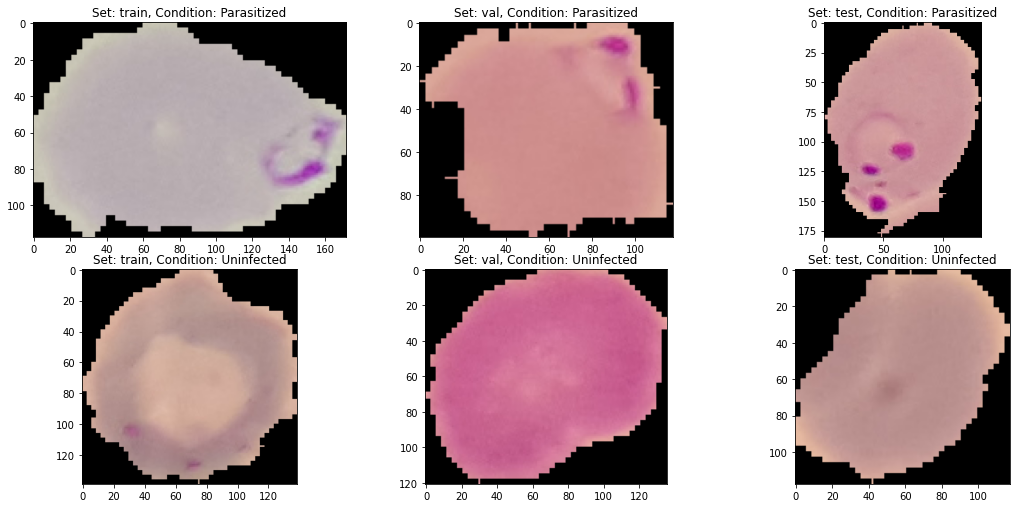

In [18]:
input_path = 'images/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Parasitized/'+os.listdir(set_path+'/Parasitized')[0]))
    ax[i].set_title('Set: {}, Condition: Parasitized'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Uninfected/'+os.listdir(set_path+'/Uninfected')[0]))
    ax[i+3].set_title('Set: {}, Condition: Uninfected'.format(_set))

##**Model Building**  

A pre-trained Inception V3 model is used for Feature extraction followed by SVM classifier to build the model

Inception V3 takes an input size of (299, 299)

####**Feature Extraction Using a Pretrained Model**  

First, we need to pick which **intermediate layer of Inception V3** we will use for **feature extraction**. A **common practice is to use the output of the very last layer before the Flatten operation, the so-called "bottleneck layer."**   

The reasoning here is that **the following fully connected layers will be too specialized** for the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. **The bottleneck features, however, retain much generality.**

Let's instantiate an Inception V3 model preloaded with weights trained on ImageNet:



In [19]:
from tensorflow.keras import layers
from tensorflow.keras import Model

**Downloading the weights**

In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-07-25 02:33:06--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   243MB/s    in 0.3s    

2021-07-25 02:33:06 (243 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

By specifying the **include_top=False** argument, we load a **network that doesn't include the classification layers at the top**—ideal for feature extraction.  

Let's **make the model non-trainable**, since we will only use it for feature extraction; **we won't update the weights of the pretrained model** during training.

In [22]:
for layer in pre_trained_model.layers:
  layer.trainable = False

The layer we will use for feature extraction in Inception v3 is called **mixed7**. It is **not the bottleneck** of the network, but we are using it to keep a **sufficiently large feature map (7x7 in this case)**. (Using the bottleneck layer would have resulting in a 3x3 feature map, which is a bit small.) Let's get the output from mixed7:

In [23]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [24]:
# Summary of the model 
print(pre_trained_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

##**Adding a fully connected classifier on top of `last_output`:**  

We are going to use **SVM classifier**.

For **binary classification**, activation is 'linear' and loss function is 'hinge' and number of nodes in the output layer is 1 (LinearSVM).

For **multiclass classification**, activation is 'softmax' and the loss function is 'squared_hinge' and number of nodes are more than 1.

In the output layer, we use kernal_regularizer=l2(0.001) and adam optimizer as they produce a high accuracy model.

In [26]:
from tensorflow.keras.regularizers import l2

In [27]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.7)(x)
# Add a final sigmoid layer for binary classification
x = layers.Dense(1, kernel_regularizer = l2(0.001), activation='linear')(x)
# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='hinge',
              optimizer= 'adam',
              metrics=['acc'])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

##**Preprocessing data:**

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
training_set = train_datagen.flow_from_directory('images/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19290 images belonging to 2 classes.


In [31]:
validation_set = val_datagen.flow_from_directory('images/val',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


In [32]:
test_set = test_datagen.flow_from_directory('images/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


###**Fitting the model**  

Model accuracy greatly depends on the epochs, steps_per_epoch and the batch_size.  

In general, a deep learning model has to go through **10-20 epochs** with **100 steps_per_epoch** to give good accuracy.  

With **transfer learning models**, the computational cost is highly reduced due to the usage of pre-trained weights. Here, the model can attain a high accuracy in just **2-5 epochs**.

We set the **batch_size = 32** and used **5 epochs**. 

Steps_per_epoch are set to **len(training_set/32) = 19** where  
**len(training_set) = 603**

In [57]:
import math
tma = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=5,
  steps_per_epoch=math.ceil(len(training_set)/32),
  validation_steps=len(validation_set))

Epoch 1/5
19/19 [==============================] - 9s 507ms/step - loss: 0.1702 - acc: 0.9326 - val_loss: 0.1353 - val_acc: 0.9480
Epoch 2/5
19/19 [==============================] - 9s 496ms/step - loss: 0.1617 - acc: 0.9391 - val_loss: 0.1362 - val_acc: 0.9473
Epoch 3/5
19/19 [==============================] - 10s 520ms/step - loss: 0.1788 - acc: 0.9194 - val_loss: 0.1375 - val_acc: 0.9509
Epoch 4/5
19/19 [==============================] - 10s 538ms/step - loss: 0.1583 - acc: 0.9457 - val_loss: 0.1423 - val_acc: 0.9482
Epoch 5/5
19/19 [==============================] - 10s 538ms/step - loss: 0.1516 - acc: 0.9457 - val_loss: 0.1377 - val_acc: 0.9478


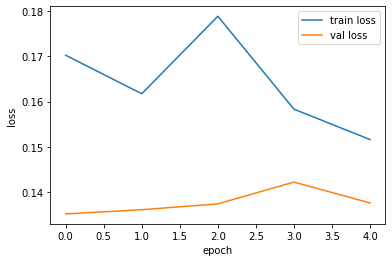

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the loss
plt.plot(tma.history['loss'], label='train loss')
plt.plot(tma.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')

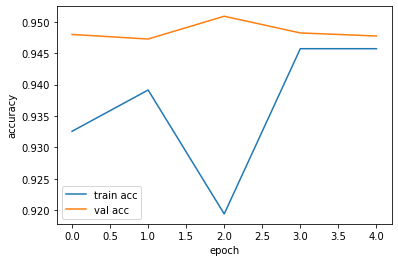

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the accuracy
plt.plot(tma.history['acc'], label='train acc')
plt.plot(tma.history['val_acc'], label='val acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##**Evaluating model:**

In [60]:
val = model.evaluate(test_set)

130/130 [==============================] - 6s 49ms/step - loss: 0.1368 - acc: 0.9446


In [61]:
print("test loss: ",val[0])
print("test accuracy: ",val[1])

test loss:  0.13676919043064117
test accuracy:  0.9446057081222534
